In [38]:
import struct
s = b'\n'
a = (struct.unpack('B',s))
type(a[0])

int

In [19]:
import numpy
a=numpy.zeros([3,4])
c =numpy.array([[1,2],[2,3]])
b = numpy.r_[a,c.reshape(1,-1)]
numpy.delete(b,0,axis=0)



array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [1., 2., 2., 3.]])

In [2]:
a[0,0]=1
a[0,1]=2
a[1,0]=9
a[2,1]=12
print(a)

[[ 1.  2.]
 [ 9.  0.]
 [ 0. 12.]]


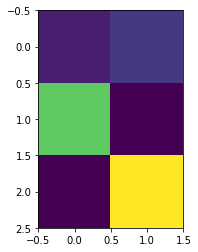

In [4]:
import matplotlib.pyplot as plt
plt.imshow(a,interpolation='nearest')

In [3]:
import numpy
import scipy.special
import matplotlib.pyplot as plt
#neural network class definition
class neuralNetwork:
    
    #initalise the neural network
    def __init__(self,inputnodes,hiddennodes,outputnodes,learningrate):
        #set number of nodes in each input,hidden,output layer
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        #link weight matrices,wih and who
        #weights inseide the arrays are w_i_j,where link is from node i to j in the next layer
        #w11 w21
        #w12 w22etc
        self.wih = numpy.random.normal(0.0,pow(self.hnodes,-0.5),(self.hnodes,self.inodes))
        self.who = numpy.random.normal(0.0,pow(self.onodes,-0.5),(self.onodes,self.hnodes))
        
        #learning rate
        self.lr = learningrate
        
        #activation function is the sigmoid function
        self.activation_function = lambda x:scipy.special.expit(x)
        pass
    
    #train the neural network
    def train(self,inputs_list,targets_list):
        #convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        #calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        #calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        #calculate signals into final output layer
        final_inputs = numpy.dot(self.who,hidden_outputs)
        #calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        #error is the (target-actual)
        output_errors = targets-final_outputs
        #hidden layer error is the output_errors,split by weights,recombined at hidden nodes
        hidden_errors = numpy.dot(self.who.T,output_errors)
        
        #update the weights for the links between the hidden and output layers
        self.who += self.lr * numpy.dot((output_errors*final_outputs*(1-final_outputs)),numpy.transpose(hidden_outputs))
        #update the weights for the links between the input and hidden layers
        self.wih += self.lr*numpy.dot((hidden_errors*hidden_outputs*(1.0-hidden_outputs)),numpy.transpose(inputs))
        pass
    
    #query the neural network
    def query(self,inputs_list):
        #convert inputs list to 2d array
        inputs = numpy.array(inputs_list,ndmin=2).T
        
        #calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih,inputs)
        #calculate the signals emerging from hidden_layer
        hidden_outputs = self.activation_function(hidden_inputs)
        #calculate signals into final output layer
        final_inputs = numpy.dot(self.who,hidden_outputs)
        #calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        return final_outputs
    

In [4]:
import pickle
import gzip
#number of input,hidden and output nodes
input_nodes = 784
hidden_nodes = 100
output_nodes = 10

#learning rate is 0.3
learning_rate = 0.3

#create instance of neural network
n = neuralNetwork(input_nodes,hidden_nodes,output_nodes,learning_rate)

def load_data():
    with gzip.open('./mnist.pkl.gz','rb') as fp:
        training_data,valid_data,test_data = pickle.load(fp,encoding='iso-8859-1')
        return training_data,valid_data,test_data
    
training_data,valid_data,test_data = load_data()
for ipdata,tgdata in zip(training_data[0],training_data[1]):
    inputs = list(ipdata+0.0001)
    targets = numpy.zeros(output_nodes)+0.0001
    targets[int(tgdata)] = 0.9999
    n.train(inputs,targets)


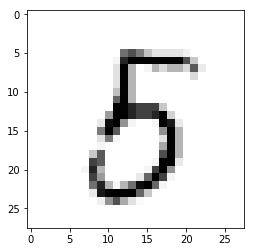

In [8]:
ntest =  45
plt.imshow(test_data[0][ntest].reshape((28,28)),cmap='Greys',interpolation='None')
# for inputs,aimputs in zip(test_data[0],test_data[1]):
#     correct_label = int(aimputs)
#     outputs = n.query(inputs+0.0001)
#     label = numpy.argmax(outputs)
#     print(correct_label,label,end='\t')
